# Marginal Working Group
This is a program that will analyze the margin for JPL IPE MWG.

Last updated: 2019/07/08 by Kevin Lee
kevin.lee@jpl.nasa.gov 
kevincorvallis@gmail.com
(541)-243-3053




Import file from the directory you are working in. 
I will be using pandas to organize the .csv file that we are dealing with. df = Data Frame

In [41]:
import pandas as pd
import urllib
import os, sys, json, re
from math import *
from scipy import stats
import numpy as np


filename = "1500_2400Soles.json"
f = open(filename, "r")
data = pd.read_json(f)


# with open(filename) as fp:
#     data = json.load(fp)

In [42]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import plotly_express as px

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [43]:
import plotly as py
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import time as dt_tm
from datetime import date as dt_date

import plotly.plotly as py
import plotly.tools as plotly_tools
import plotly.graph_objs as go

import os
import tempfile
os.environ['MPLCONFIGDIR'] = tempfile.mkdtemp()
# from matplotlib.finance import quotes_historical_yahoo
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

from IPython.display import HTML

In [44]:
data

,sol1500_sub_00500,sol1500_sub_01500,sol1501_sub_00501,sol1501_sub_01501,sol1501_sub_02501,sol1502_sub_00502,sol1502_sub_01502,sol1502_sub_02502,sol1502_sub_03502,sol1503_sub_00503,...,sol2396_sub_00396,sol2397_sub_00397,sol2397_sub_01397,sol2398_sub_00398,sol2399_sub_00399,sol2399_sub_01399,sol2400_sub_00400,sol2400_sub_02400,sol2400_sub_03400,sol2401_sub_00401
actActivityDur,4373.94,4912.77,3952.9,5682.78,511.089,4624.02,3944.53,499.436,6541.4,2429.04,...,5134.55,2127.51,68.6576,565.812,5790.5,917.679,2560.19,3441.13,288.624,5418.81
actMarginDur,1286.21,2555.58,969.099,3102.22,163.911,1244.11,2450.33,160.564,1103.6,556.026,...,1008.58,770.493,81.3424,174.188,676.67,168.321,309.829,740.984,816.376,1656.19
backboneType,[SB],"[drive, PDI]",[SB],"[drive, PDI]",[unidentified],[SB],"[drive, PDI]","[arm, unidentified]","[unidentified, SB]",[SB],...,"[otherSci, ECAM, unidentified, SB]",[arm],[ECAM],"[ECAM, otherSci]","[ECAM, otherSci, SB]",[SB],"[ECAM, SB]",[SB],[SB],"[arm, ECAM, unidentified]"
masterSol,1500,1500,1501,1501,1501,1502,1502,1502,1502,1503,...,2396,2397,2397,2398,2399,2399,2400,2400,2400,2401
planActivityDur,4820.15,6268.35,4432,7585,555,5028.13,5302.86,510,7225,2535.07,...,5243.13,2298,120,620,5957.17,966,2570.02,3882.11,985,5875
planMarginDur,840,1200,490,1200,120,840,1092,150,420,450,...,900,600,30,120,510,120,300,300,120,1200
planTotalDur,5660.15,7468.35,4922,8785,675,5868.13,6394.86,660,7645,2985.07,...,6143.13,2898,150,740,6467.17,1086,2870.02,4182.11,1105,7075
seqId,sub_00500,sub_01500,sub_00501,sub_01501,sub_02501,sub_00502,sub_01502,sub_02502,sub_03502,sub_00503,...,sub_00396,sub_00397,sub_01397,sub_00398,sub_00399,sub_01399,sub_00400,sub_02400,sub_03400,sub_00401
uniqueID,sol1500_sub_00500,sol1500_sub_01500,sol1501_sub_00501,sol1501_sub_01501,sol1501_sub_02501,sol1502_sub_00502,sol1502_sub_01502,sol1502_sub_02502,sol1502_sub_03502,sol1503_sub_00503,...,sol2396_sub_00396,sol2397_sub_00397,sol2397_sub_01397,sol2398_sub_00398,sol2399_sub_00399,sol2399_sub_01399,sol2400_sub_00400,sol2400_sub_02400,sol2400_sub_03400,sol2401_sub_00401


In [45]:
sys.executable #You see which python you are executing 

'/anaconda3/bin/python'

Whenever downloaindg modules, it is not directly connected to the computers python engine. 
In my case, sys.executable shows up as '/anaconda3/bin/python' so whenever I download a library I need to
run terminal and do $/anaconda3/bin/python -m pip install LIBRARY

In [46]:
sys.path #Additional info where your python packages should be installed 

['/Users/kevinl/MWG/Python3',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/kevinl/.ipython']

In [47]:
# x = np.linspace(0, np.pi, 1000)

# layout = go.Layout(
#     title = "Marginal Working Group Duration",
#     yaxis = dict(
#         title = "Time"
#     ),
#     xaxis = dict(
#         title = "soles"
#     )
# )


# trace1 = go.Scatter(
#     x = x,
#     y = np.sin(x),
#     mode = "lines", 
#     name = "sin(x)",
#     line = dict(
#         shape = "spline"
#     )
# )


# fig = go.Figure(data=[trace1], layout = layout)
# py.iplot(fig)

In [48]:
x = []
y = []
ma = []

def moving_average(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

date1 = dt_date( 2014, 1, 1 )
date2 = dt_date( 2014, 12, 12 )
quotes = quotes_historical_yahoo('AAPL', date1, date2)
if len(quotes) == 0:
    print "Couldn't connect to yahoo trading database"
else:
    dates = [q[0] for q in quotes]
    y = [q[1] for q in quotes]
    for date in dates:
        x.append(datetime.fromordinal(int(date))\
                .strftime('%Y-%m-%d')) # Plotly timestamp format
    ma = moving_average(y, 10)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Couldn't connect to yahoo trading database")? (<ipython-input-48-a731a6c794ad>, line 13)

In [49]:
# data["sol2170_sub_00170"].iplot(
#     kind="hist",
#     xTitle="claps",
#     yTitle="count",
#     title="Kevin Lee")

In [50]:
# ===============================INITIALIZING ARRAYS =====================================
planSubDurArr = []
actSubDurArr = []
amountMarginUsedArr = {"all":[], "sb":[],"arm": [],"drive": []}
percentMarginUsedArr = {"all":[], "sb":[],"arm": [],"drive": []}
percentPlannedMarginArr = {"all":[], "sb":[],"arm": [],"drive": []}
amountUnusedTimeArr = {"all":[], "sb":[],"arm": [],"drive": []}
subsUsingMarginArr = []
over50PerMarginUseSBArr = []

In [51]:
#==========================================================================================
#==========================================================================================
#=================================== ADDING DATA ==========================================
#==========================================================================================
#==========================================================================================
for uniqueId in data.keys():
#     print(uniqueId)
    #============================amountMarginUsed=======================================
    #Iterating through Unique ID column and calculating the amountMargin actually used by 
    #subtracting plannedMarginDuration -
    # Divide 60 to get in minutes and round nearest 3rd decimal place. 
    amountMarginUsed = round((data[uniqueId]['planMarginDur'] - data[uniqueId]['actMarginDur'])/60,3) 
    amountMarginUsedArr["all"].append(amountMarginUsed) #appending all of the marginal data 
    if ('SB' in data[uniqueId]['backboneType']):
            amountMarginUsedArr['sb'].append(amountMarginUsed)
    elif ('arm' in data[uniqueId]['backboneType']):
        amountMarginUsedArr['arm'].append(amountMarginUsed)
    elif ('drive' in data[uniqueId]['backboneType']):
        amountMarginUsedArr['drive'].append(amountMarginUsed)
    #============================percentMarginUsed=======================================
    # percent margin used is the amountMarginUsed / planMarginDur in minutes
    percentMarginUsed = round(amountMarginUsed/(data[uniqueId]['planMarginDur']/60),5)*100
    percentMarginUsedArr["all"].append(percentMarginUsed)
    if ('SB' in data[uniqueId]['backboneType']):
        percentMarginUsedArr['sb'].append(percentMarginUsed)
        if percentMarginUsed > 50:
            over50PerMarginUseSBArr.append(uniqueId)
    elif ('arm' in data[uniqueId]['backboneType']):
        percentMarginUsedArr['arm'].append(percentMarginUsed)
    elif ('drive' in data[uniqueId]['backboneType']):
        percentMarginUsedArr['drive'].append(percentMarginUsed)
    #============================percentPlannedMargin=======================================
    # percentPlannedMargin is the planMarginDur / planActivityDur in minutes
    percentPlannedMargin = round(data[uniqueId]['planMarginDur']/data[uniqueId]['planActivityDur'],5)*100
    percentPlannedMarginArr["all"].append(percentPlannedMargin)
    if ('SB' in data[uniqueId]['backboneType']):
        percentPlannedMarginArr['sb'].append(percentPlannedMargin)
    elif ('arm' in data[uniqueId]['backboneType']):
        percentPlannedMarginArr['arm'].append(percentPlannedMargin)
    elif ('drive' in data[uniqueId]['backboneType']):
        percentPlannedMarginArr['drive'].append(percentPlannedMargin)
    #============================create a summary=======================================
    if (percentMarginUsed > 0):
        subsUsingMarginArr.append(uniqueId)
    #  we want to summarize how many unused minutes we are saving as a comparison
    amountUnusedTime = round((data[uniqueId]['planTotalDur'] - data[uniqueId]['actActivityDur'])/60,2)
    
    if amountUnusedTime >0:
        amountUnusedTimeArr["all"].append(amountUnusedTime)
        
        if ('SB' in data[uniqueId]['backboneType']):
            amountUnusedTimeArr['sb'].append(amountUnusedTime)
        elif ('arm' in data[uniqueId]['backboneType']):
            amountUnusedTimeArr['arm'].append(amountUnusedTime)
        elif ('drive' in data[uniqueId]['backboneType']):
            amountUnusedTimeArr['drive'].append(amountUnusedTime)    

In [52]:
percentMarginUsedArr.keys()


dict_keys(['all', 'sb', 'arm', 'drive'])

In [53]:
#Percent of Explicit Margin Actually Used', '% of Planned Margin', 'Count', percentMarginUsedArr)

df_percentMarginUsed = pd.DataFrame(columns = ['all', 'sb', 'arm', 'drive'])
for column in df_percentMarginUsed.keys():
    df_percentMarginUsed[column] = pd.Series(percentMarginUsedArr[column])
    
print(df_percentMarginUsed[:10])

       all       sb      arm    drive
0  -53.121  -53.121   -7.040 -112.965
1 -112.965  -97.776  -24.150 -158.520
2  -97.776  -48.107  -21.500 -124.390
3 -158.520 -162.757   -3.980   25.355
4  -36.600  -23.560  -14.700 -154.575
5  -48.107  -79.060  -13.045 -124.330
6 -124.390  -44.465 -104.987  -73.566
7   -7.040  -45.367  -16.073    8.056
8 -162.757  -41.800  -10.400  -35.340
9  -23.560  -31.867  -42.110 -155.980


In [54]:
df_percentMarginUsed['all'].iplot(kind='hist', xTitle='% of Planned Margin',
                  yTitle='Count', title='All Activities')

In [55]:
# amountUnusedTimeArr.keys()
df_amountUnusedTime = pd.DataFrame(columns = amountUnusedTimeArr.keys())
for column in amountUnusedTimeArr.keys():
    df_amountUnusedTime[column] = pd.Series(amountUnusedTimeArr[column])


# gapminder = px.data.gapminder()
# gapminder2019 = df_amountUnusedTime.query("a")
# gapminder2019
# px.scatter(df_amountUnusedTime, x="all", y="drive")
df_amountUnusedTime['all'].iplot(kind='hist', xTitle='% of Planned Margin',
                  yTitle='Occurances', title='All Activities')

In [56]:
df_amountUnusedTime.iplot(kind='hist', xTitle='% of Planned Margin',
                  yTitle='Occurances', title='All Activities')

In [57]:
df_amountMarginUsed = pd.DataFrame(columns = ["all", "sb", "arm", "drive"])
df_amountMarginUsed["all"] = amountMarginUsedArr["all"]
df_amountMarginUsed["sb"] = pd.Series(amountMarginUsedArr["sb"])
df_amountMarginUsed["arm"] = pd.Series(amountMarginUsedArr["arm"])
df_amountMarginUsed["drive"] = pd.Series(amountMarginUsedArr["drive"])
df_amountMarginUsed


# for column in df_amountMarginUsed.keys():
#     df_amountMarginUsed[column] = amountMarginUsedArr[column]

    
df_amountMarginUsed[:10]
    

,all,sb,arm,drive
0,-7.437,-7.437,-0.176,-22.593
1,-22.593,-7.985,-5.796,-31.704
2,-7.985,-6.735,-5.160,-22.639
3,-31.704,-11.393,-0.199,5.071
4,-0.732,-1.767,-2.205,-30.915
5,-6.735,-7.906,-3.457,-24.866
6,-22.639,-8.893,-8.399,-12.874
7,-0.176,-1.361,-2.411,1.877
8,-11.393,-1.254,-0.520,-8.835
9,-1.767,-0.956,-10.759,-31.196


In [58]:
import plotly_express as px
# gapminder = px.data.gapminder()
# gapminder = df_amountMarginUsed.query("all == 2019")
px.scatter(df_percentMarginUsed, x="arm", y="drive")



In [24]:
df_amountMarginUsed.iplot(kind='hist', xTitle='Amount of Explicit Margin Used (min)',
                  yTitle='Count', title='All Activities')

In [26]:
# df_amountMarginUsed['line'].iplot(kind='hist', xTitle='Amount of Explicit Margin Used (min)',
#                   yTitle='Count', title='All Activities')

In [25]:
df_amountMarginUsed['arm'].iplot(kind='hist', xTitle='Amount of Explicit Margin Used (min)',
                  yTitle='Count', title='Arm Backbones')

In [29]:
def plot_titleAndLabels (fig, title_s, xlabel_s, ylabel_s, subplotNum=[]):
    #Inputs:
    #   fig = matplotlib figure number as integer; defined from instantiation of figure
    #   title_s = string of the title to put on the figure
    #   xlabel_s = string of the xlabel to put on the figure
    #   ylabel_s = string of the ylabel to put on the figure
    # Outputs:
    #   returns the figure with updated entries
    plt.figure(fig)
    print("Subplot numbers are ", subplotNum)
    if subplotNum:
        plt.subplot(subplotNum[0], subplotNum[1],subplotNum[2])
        if (subplotNum[2]>subplotNum[0]*subplotNum[1]-subplotNum[0]):
            plt.xlabel(xlabel_s)
    else:
        plt.xlabel(xlabel_s)
    plt.title(title_s)
    plt.ylabel(ylabel_s)
    return fig

In [30]:
def hist_fixedBinsWidth (fig, arr, width = 1, subplotNum = [], binOverrides = None):
    #Inputs: 
    #   fig = matplotlib figure number as integer; defined from instantiation of figure
    #   arr = array to be plotted on a histogram
    #   width = custom Width of bins as an integer. 
    # Outputs:
    #   returns the figure with updated entries
    binLow = None
    binHigh = None
    if binOverrides:
        if binOverrides[0] != None:
            binLow = binOverrides[0]
        if binOverrides[1] != None:
            binHigh = binOverrides[1]
    if not binLow:
        binLow = int(floor(min(arr)/width)*width)
    if not binHigh:
        binHigh = int(ceil(max(arr)/width)*width)
    binsDist = range(binLow, binHigh+width, width)
    plt.figure(fig)
    if subplotNum:
        plt.subplot(subplotNum[0], subplotNum[1],subplotNum[2])                
    plt.hist(arr, rwidth=.95, bins = binsDist)
    return fig

Subplot numbers are  [2, 2, 1]
Subplot numbers are  [2, 2, 2]
Subplot numbers are  [2, 2, 3]
Subplot numbers are  [2, 2, 4]
Subplot numbers are  [2, 2, 1]


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Subplot numbers are  [2, 2, 2]
Subplot numbers are  [2, 2, 3]
Subplot numbers are  [2, 2, 4]


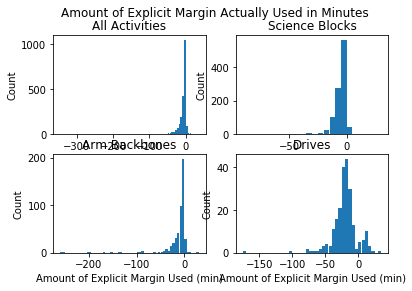

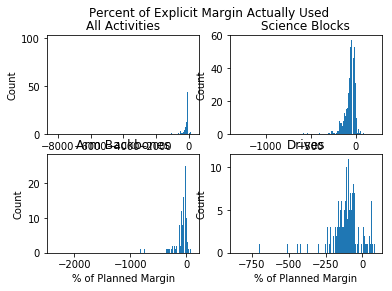

In [31]:
def makeQuadPlot (figNum, title, xLabel, yLabel, dataArr , binOverrides = None):
    fig = plt.figure(figNum)
    fig.suptitle(title)
    plot_titleAndLabels (figNum, 'All Activities', xLabel, yLabel, [2,2,1])
    if binOverrides:
        hist_fixedBinsWidth (figNum,dataArr['all'],5, [2,2,1], binOverrides)
    else:
        hist_fixedBinsWidth (figNum,dataArr['all'],5, [2,2,1])
    plt.figure(figNum)
    plot_titleAndLabels (figNum, 'Science Blocks', xLabel, yLabel, [2,2,2])
    if binOverrides:
        hist_fixedBinsWidth (figNum,dataArr['sb'],5, [2,2,2], binOverrides)
    else: 
        hist_fixedBinsWidth (figNum,dataArr['sb'],5, [2,2,2])
    plt.figure(figNum)
    plot_titleAndLabels (figNum, 'Arm Backbones', xLabel, yLabel, [2,2,3])
    if binOverrides:
        hist_fixedBinsWidth (figNum,dataArr['arm'],5, [2,2,3], binOverrides)
    else: 
        hist_fixedBinsWidth (figNum,dataArr['arm'],5, [2,2,3])
    plt.figure(figNum)
    plot_titleAndLabels (figNum, 'Drives', xLabel, yLabel,[2,2,4])
    if binOverrides:
        hist_fixedBinsWidth (figNum,dataArr['drive'],5, [2,2,4], binOverrides)
    else: 
        hist_fixedBinsWidth (figNum,dataArr['drive'],5, [2,2,4], binOverrides)
        
        
makeQuadPlot (1, 'Amount of Explicit Margin Actually Used in Minutes', 'Amount of Explicit Margin Used (min)', 'Count', amountMarginUsedArr)      
makeQuadPlot (2, 'Percent of Explicit Margin Actually Used', '% of Planned Margin', 'Count', percentMarginUsedArr)

In [27]:
# dfarm = pd.DataFrame(amountMarginUsedArr["arm"])
dfall = pd.DataFrame(amountMarginUsedArr["all"])
# dfsb = pd.DataFrame(amountMarginUsedArr["sb"])
# dfdrive = pd.DataFrame(amountMarginUsedArr["drive"])
# df = pd.DataFrame(amountMarginUsedArr)
# df1 = pd.DataFrame(amountMarginUsedArr)
print("Arm is ", len(amountMarginUsedArr["arm"]))
print("All is ", len(amountMarginUsedArr["all"]))

print("Sb is ", len(amountMarginUsedArr["sb"]))

print("Drive is ", len(amountMarginUsedArr["drive"]))


dfall


Arm is  281
All is  2010
Sb is  1054
Drive is  259


,0
0,-9.768
1,-5.604
2,-0.044
3,-1.892
4,-6.213
5,-2.811
6,-2.603
7,-3.536
8,-0.375
9,-1.590


In [28]:
dfall.iplot(
    kind="hist",
    xTitle="claps",
    yTitle="count",
    title="Kevin Lee")

In [29]:
#Write out
# df_kb.to_csv(r'output.csv')

In [45]:
second_plot_url = df_amountMarginUsed.plot(fig, height=1000, width=1000, auto_open=False,\
                          filename='Major technology and CPG stock prices in 2014 - scatter matrix')
print(second_plot_url)


In [46]:
summary_table_2 = '''<table class="table table-striped">
<th>Ticker</th><th>Full name</th>
<tr>
    <td>AAPL</td>
    <td><a href="http://finance.yahoo.com/q?s=AAPL">Apple Inc</a></td>
</tr>
<tr>
    <td>GE</td>
    <td><a href="http://finance.yahoo.com/q?s=GE">General Electric Company</a></td>
</tr>
<tr>
    <td>IBM</td>
    <td><a href="http://finance.yahoo.com/q?s=IBM">International Business Machines Corp.</a></td>
</tr>
<tr>
    <td>KO</td>
    <td><a href="http://finance.yahoo.com/q?s=KO">The Coca-Cola Company</a></td>
</tr>
<tr>
    <td>MSFT</td>
    <td><a href="http://finance.yahoo.com/q?s=MSFT">Microsoft Corporation</a></td>
</tr>
<tr>
    <td>PEP</td>
    <td><a href="http://finance.yahoo.com/q?s=PEP">Pepsico, Inc.</a></td>
</tr>
</table>
'''
HTML(summary_table_2)

AAPL,Apple Inc
GE,General Electric Company
IBM,International Business Machines Corp.
KO,The Coca-Cola Company
MSFT,Microsoft Corporation
PEP,"Pepsico, Inc."


In [50]:
html_string = '''
<html>
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <h1>2014 technology and CPG stock prices</h1>

        <!-- *** Section 1 *** --->
        <h2>Section 1: Apple Inc. (AAPL) stock in 2014</h2>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + first_plot_url + '''.embed?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p>
        
        
        <h3>Reference table: stock tickers</h3>
        ''' + summary_table_2 + '''
        <h3>Summary table: 2014 stock statistics</h3>
        ''' + summary_table_1 + '''
    </body>
</html>'''

NameError: name 'first_plot_url' is not defined